##### [< Forrige](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)     |     [Neste >](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 5 - sympy </span>  

Sympy er en veldig nyttig pakke innenfor samfunnsøkonomi. Med den kan vi regne analytisk, det vil si med symboler. I samfunnsøkonomi bruker vi mye matematikk som denne pakken kan hjelpe oss med. Vi starter med et eksempel på utregning av profittmaksimum:

# Eksempel med optimal mengde arbeidskraft

Anta at du er bedriftsleder, og lurer på hvor mange medarbeidere du skal ansette. For en gitt mengde arbeidskraft produseres

#### Eksempel 1:

In [1]:
def f(L,a):
    return 60*L**a

`a` definerer produktiviteten til de ansatte. Desto høyere `a` er, desto mer produktive er de ansatte. Vi kan plotte denne funksjonen:

#### Eksempel 2:

Text(0, 0.5, 'Produksjon')

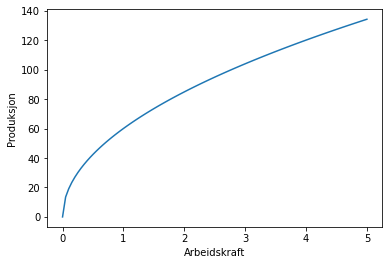

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,100)

plt.plot(x,f(x,0.5))
plt.xlabel('Arbeidskraft')
plt.ylabel('Produksjon')

Som vi ser er produktiviteten avtakende, kurven stiger mindre utover i diagrammet. Det er fordi `a` er mindre enn én. (Forsøk med andre tall for `a`!)

Når produktfunksjonen er definert, kan vi definere fortjenesten til bedriften, eller "profittfunksjonen" som vi gjerne kaller det i samfunnsøkonomi. La oss si at bedriften betaler hver arbeider `w` tusen kroner, og at faste utgifter er `K`. 

Fortenesten er pris ganger solgt mengde, `p*f(L,a)` og kostnadene er lønnskostnader `w*L` og faste utgifter `K`. Profittfunksjonen blir da

#### Eksempel 3:

In [8]:
def profit(L,a,w,p,K):
    return p*f(L,a)-w*L-K

La oss se på den grafisk. Dersom prisen per enhet er hundre kroner, lønna er 2 500 per dag og bedriften har 300 000 i faste utgifter per dag, så ser profittfunksjonen slik ut:

#### Eksempel 4:

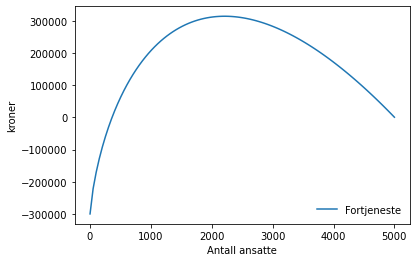

In [11]:
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np

#creating the plot
x = np.linspace(0,5000,100)
fig,ax=plt.subplots()
ax.set_ylabel('kroner')
ax.set_xlabel('Antall ansatte')


#plotting the function
plt.plot(x,profit(x,0.9,2500,100,300000),label='Fortjeneste')
ax.legend(loc='lower right',frameon=False)

Vi bruker metoden med `fig,ax=plt.subplots()`, siden vi skal bygge på denne grafen. 

Vi skal nå begynne å bruke sympy. Det første vi må gjøre er å definere hvilke symboler som skal behandles analytisk (altså som symboler og ikke flyttall). Det gjør vi slik:

#### Eksempel 5:

In [12]:
import sympy as sp
L,a,w,p,K=sp.symbols("L a w p K")

Med symbolene definert, vil nå vår profittfunksjon vises analytisk når vi bruker de definere symbolene:


#### Eksempel 6:

In [13]:
profit(L,a,w,p,K)

-K - L*w + 60*L**a*p

Vi ønsker å finne ut for hvilken arbeidskraft fortjenesten er størst. Det er det høyeste punktet i figuren fra Eksempel 3. På dette punktet har profittfunksjonen ingen stigning, slik at den deriverte er null. For å finne dette punktet må vi først finne den *deriverte*. Det gjør vi i sympy med funksjonen `diff()`. Den tar to argumenter. Det første er funksjonen, det andre er den variabel vi ønsker å derivere med hensyn til. 

Som vi ser av figuren i Eksempel 3, så har vi arbeidskraft `L` langs x-aksen, så det er denne variabelen vi ønsker å derivere med hensyn til. Den deriverte av `profitt()` med hensyn til `L` er dermed:

#### Eksempel 7:

In [14]:
d_profitt=sp.diff(profit(L,a,w,p,K),L)
d_profitt

-w + 60*L**a*a*p/L

For å finne punktet der denne deriverte er null, setter vi opp en ligning der den deriverte er null, og løser for den `L` som tilfredstiller ligningen. En slik ligning kalles "førsteordensbetingelse", eller "first order condition" på engelsk. Vi forkorter den derfor til "foc":

#### Eksempel 8:

In [15]:
foc=sp.Eq(d_profitt,0)
foc

Eq(-w + 60*L**a*a*p/L, 0)

Vi kan nå løse førsteordensbetingelsen med funksjonen `solve`, som ligger i modulen `solvers`i sympy:

#### Eksempel 9:

In [18]:
from sympy.solvers import solve
L_max=solve(foc,L)[0]
L_max

(60*a*p/w)**(-1/(a - 1))

Legg merke til at resultatet ligger i en liste med lengde 1, så vi må hente ut element 0 i listen for å vise resultatet. Vi kan finne hva den analytiske verdien er i maksimum ved å sette `L_max`inn i profittfunksjonen:

#### Eksempel 10:

In [22]:
profit_max=profit(L_max,a,w,p,K)
profit_max

-K + 60*p*((60*a*p/w)**(-1/(a - 1)))**a - w/(60*a*p/w)**(1/(a - 1))

Vi kan nå beregne de nummeriske verdiene ved å sette inn noen passende tall for de ukjente symbolene. Vi prøver med 0.5 for produktivitet `a`, 0.3 for lønn `w`, 1 for prise `p` og 1 for kapital `K`. Vi forteller sympy om at vi ønsker å bruke dise verdiene ved å lage et oppslag der hvert av symbolene er nøkkel til hver av de nummeriske verdiene:

#### Eksempel 11:

In [20]:
num_dict={a:0.9,w:2500,p:100,K:300000}

Vi kan nå finne nummerisk hvor mye arbeidskraft som trengs for å oppnå maksimal fortjeneste:

#### Eksempel 12:

In [21]:
L_max.subs(num_dict)

2210.73919720734

Om vi nå legger dette tallet inn for symbol `L`, kan vi finne hvor stor fortjenesten er i dette punktet. Vi starter med å legge inn verdien for L som gir maksimal fortjeneste:

#### Eksempel 13:

In [23]:
num_dict[L]=L_max.subs(num_dict)
num_dict

{a: 0.9, w: 2500, p: 100, K: 300000, L: 2210.73919720734}

Med det oppdaterte oppslaget blir fortjenesten

#### Eksempel 14:

In [24]:
profit_max_num=float(profit(L,a,w,p,K).subs(num_dict))
profit_max_num

314094.22144648153

Med modulene `display`og `Markdown`fra `IPython` (pakken som driver Jupyter), kan vi sette dette in i en pen tabell:

#### Eksempel 15:

In [25]:
from IPython.display import Markdown

tbl=f"""
|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | ${np.round(float(num_dict[L]),1)}$         |${sp.latex(L_max)}$            | 
| Maksimal profitt                | ${np.round(float(profit_max_num),1)}$    |${sp.latex(profit_max)}$       | 

"""
display(Markdown(tbl))


|                                 | Desimalverdi                             |  Analytisk verdi              | 
| :-------------------------------| :----------------------------------------| :-----------------------------| 
| Optimal mengde arbeidskraft:     | $2210.7$         |$\left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}$            | 
| Maksimal profitt                | $314094.2$    |$- K + 60 p \left(\left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}\right)^{a} - w \left(\frac{60 a p}{w}\right)^{- \frac{1}{a - 1}}$       | 



La oss nå plotte løstningen. Vi plotter her følgende, i rekkefølge:
1. Den opprinnelige profittfunksjonen
2. Den horisontale tangenten som tangerer i maksimumspunktet
3. En vertikal linje som viser mengden arbeidskraft i optimum. 

Legg merke til at vi legger inn verdiene vi har definert i `num_dict` inn i profittfunksjonen. Generelt er det en god idé i programmering å "hardkode" tall minst mulig. Definer det heller tallet som en variabel eller element i en `dict`og referer til det senere. 

#### Eksempel 16:

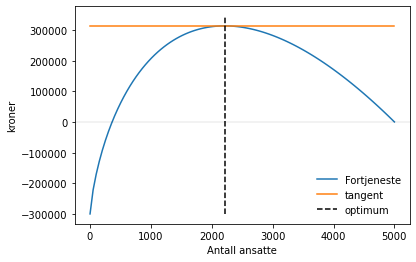

In [26]:

ax.plot(x,
        profit_max_num*np.ones(len(x)),
        label='tangent')
ax.vlines(float(L_max.subs(num_dict)), 
          -300000, 
          profit_max_num*1.1,
          colors=['black'],
          linestyles='dashed',
          label='optimum')

ax.legend(loc='lower right',frameon=False)
ax.axhline(0, color='black',lw=0.1)
fig

# Eksempel med tilbud og etterspørsel

I forelesning 3 definerte vi disse tilbuds og etterspørselsfunksjonene:

#### Eksempel 17:

In [27]:
def supply(x):
    return (x**2)*(1/250)
    
def demand(x):
    return 3000/(100+x)

Og vi tegnet dem slik:

#### Eksempel 18:

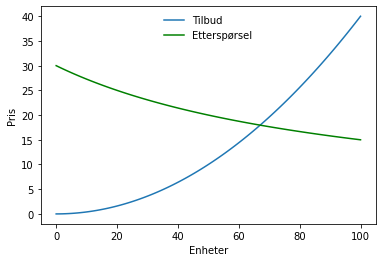

In [28]:
#drawing 100 points in the interval 0.0 to 100
q = np.linspace(1,100,100)

#creating the plot
q = np.linspace(0,100,100)
fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')


#drawing supply
ax.plot(q,supply(q),label='Tilbud')

#drawing demand
ax.plot(q,demand(q),color='green',label='Etterspørsel')

#adding legend:
ax.legend(loc='upper center',frameon=False)


Vi løste da likevekten grafisk, ved å se sånn cirka hvor tilbud er lik etterspørsel. Med sympy kan vi la python regne ut dette, og konsument og produsentoverskudd. Vi gjør dette ved å definere mengde `x` som en eksogen variabel, og sette opp ligningen vi trenger, altså at tilbud skal være lik etterspørsel:

#### Eksempel 19:

In [29]:
x=sp.symbols('x')
eq_cond=sp.Eq(demand(x),supply(x))
eq_cond

Eq(3000/(x + 100), 0.004*x**2)

Vi kan nå løse dette med solve fra sympy, som i forrige eksempel:

#### Eksempel 20:

In [31]:
x_eq=solve(eq_cond,x)
x_eq[0]

67.0125415064549

Bare én av disse løsningene er gyldige. De to siste i listen `x_eq`er såkalte "imaginære tall", det ser vi av `I`'en. Vi går ikke lenger inn på hva dette er her, men nøyer oss med å si at en likevekt ikke kan være et imaginært tall. Løsningen er altså `x_eq[0]`. Vi kan sette denne inn i enten tilbuds eller etterspørselfunksjonen for å få likevektsprisen 

#### Eksempel 21:

In [32]:
p_eq=demand(x_eq[0])
print(f"""
Likevektspris er {p_eq}
Likevektskvantum er {x_eq[0]}
""")


Likevektspris er 17.9627228766173
Likevektskvantum er 67.0125415064549



In [35]:
supply(x_eq[0])

17.9627228766173

Etterspørselskurven kan ses på som en rekke med konsumenter med ulik betalingsvilje i fallende rekkefølge. Alle konsumentene som betaler `p_eq` har dermed et overskudd som er lik differansen mellom `p_eq` og konsumentens punkt på etterspørselskurven. Summen av alle konsumentenes overskudd kalles konsumentoverskuddet. Dette kan illustreres ved å legge  et skravert område til figuren over

#### Eksempel 22:

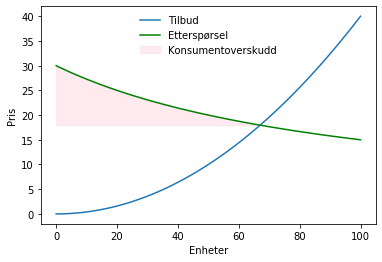

In [22]:
q = np.linspace(0,float(x_eq[0]),100)
ax.fill_between(q,float(p_eq),demand(q), color = "pink",alpha = 0.3,label='Konsumentoverskudd')
ax.legend(loc='upper center',frameon=False)
fig

Akkrat som at vi kan regnet ut skjæringspunktet med sympy, så kan vi regne ut det skraverte konsumentoverskuddet. Vi bruker da det vi har lært i matematikkurset; arealet under en funksjon er integralet til funksjonen. Vi skal finne arealet under etterspørselsfunksjonen `demand(x)`, men kun ned til prisen `p_eq`, så vi integrer differansen `demand(x)-p_eq`. Dette gjør vi for alle omsatte enheter, altså frem til omsatt kvantum `x_eq[0]`. 

Vi skal altså integrere  `demand(x)-p_eq` i intervalet 0 til `x_eq[0]`. Det kan vi gjøre i sympy slik:

#### Eksempel 23:

In [36]:
consumer_surplus=sp.integrate(demand(x)-float(p_eq),(x,0,x_eq[0]))
consumer_surplus

334.968455011534

På samme måte er *produsentoverskuddet* arealet over tilbuskurven, opp til prisen, altså det gule området i figuren under

#### Eksempel 24:

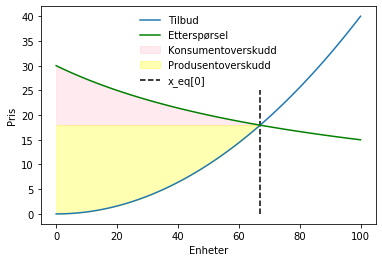

In [24]:
ax.fill_between(q,supply(q),float(p_eq), color = "yellow",alpha = 0.3,label='Produsentoverskudd')
ax.vlines(float(x_eq[0]), 0, 25,colors=['black'],linestyles='dashed', label='x_eq[0]')
ax.legend(loc='upper center',frameon=False)
fig

Vi kan regne ut dette område også, som altså er integralet av differansen mellom prisen og tilbudskruven, frem til  `x_eq[0]`.

#### Eksempel 25:

In [37]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,0,x_eq[0]))
producer_surplus

802.485141558844

Summen av produsentoverskuddet og konsumentoversdkuddet kalles "velferdsgevinsten". Vi kan finne den ved å legge sammen konsument- og produsentoverskudd:

#### Eksempel 26:

In [38]:
producer_surplus+consumer_surplus

1137.45359657038

Eller ved å ta integralet av differansen mellom etterspørsel og tilbud:

#### Eksempel 27:

In [39]:
welfare_surplus=sp.integrate(demand(x)-supply(x),(x,0,x_eq[0]))
welfare_surplus

1137.45359657038

Vi kan nå lage en tabell som oppsumerer resultatene:

#### Eksempel 28:

In [28]:
tbl=f"""
|                     | Verdi                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | ${np.round(float(x_eq[0]),1)}$           |
| Pris:               | ${np.round(float(p_eq),1)}$              |
| Verdiskapning:      | ${np.round(float(welfare_surplus),1)}$  |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),1)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),1)}$ | 
| Velferdsgevinst:    | ${np.round(float(welfare_surplus),1)}$   | 
"""
display(Markdown(tbl))


|                     | Verdi                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | $67.0$           |
| Pris:               | $18.0$              |
| Verdiskapning:      | $1137.5$  |
| Konsumentoverskudd: | $335.0$ | 
| Produsentoverskudd: | $802.5$ | 
| Velferdsgevinst:    | $1137.5$   | 


# Løse flere ligninger med flere ukjente

I eksempel 20 hadde vi én ligning med én ukjent. Det er imidlertid enkelt å løse flere ligninger med flere ukjente. Forskjellen er bare at når det er flere ligninger, så setter vi hver av disse inn i en liste. Som dere vet må det være akkurat like mange ukjente som ligninger, så vi må også sette akkurat like mange variabler inn i en annen liste. Disse to listene utgjør så argumentene i `solve()` funksjonen. La oss ta et eksempel. Vi begynner med å definere to lister med henholdsvis tre variabler og tre ligninger:

#### Eksempel 29:

In [40]:
x,y,z=sp.symbols("x y z")
symbols=[x,y,z]
equations=[
    sp.Eq(2*x+8*y+3*z,7),
    sp.Eq(-3*x+15*y-14*z,-20),
    sp.Eq(11*x-6*y+7*z,35)
]

In [41]:
equations[0]

Eq(2*x + 8*y + 3*z, 7)

Vi setter så disse to listene inn i `solve()` akkurat som om det var én ligning og én ukjent, og finner svaret:

#### Eksempel 30

In [42]:
solve(equations,symbols)

{x: 3868/1463, y: -6/77, z: 1139/1463}

## Arbeiskrav/Oppgaver

Løs oppgavene 15, 16, 17 og 19-22 i "Læresteg" i BED-1007 ([filene ligger også her](https://uit.instructure.com/courses/24032/files/folder/Arbeidskrav%205%20-%20Sympy)), ved bruk av Sympy

Arbeidskravet skal leveres på github! [Slik gjør du det.](https://uit-sok-1003-h21.github.io/github.html)

Repositoriet med løsningen på oppgaven SKAL hete "sok_1003_sympy". 

Du trenger ikke gjøre oppgavene a-d i læresteg 20. 

In [1]:
import sympy as sp
from sympy.solvers import solve

In [53]:
#Oppg15 - 1a)
x, y = sp.symbols("x y")
unknown = [x, y]
eq_a = [
    sp.Eq(2*x+4*y,6),
    sp.Eq(-2*x+y,4)
]
eq_a[1]

Eq(-2*x + y, 4)

In [54]:
sp.solve(eq_a, unknown)

{x: -1, y: 2}

In [66]:
#Oppg15 - 1b)
x, y = sp.symbols("x y")
unknown = [x, y]
eq_b = [
    sp.Eq(2*x-y, -1),
    sp.Eq(x**2+x+y,1)
]
eq_b[1]

Eq(x**2 + x + y, 1)

In [52]:
sp.solve(eq_b,unknown)

[(-3, -5), (0, 1)]

In [69]:
#Oppg15 - 2a)
x, y = sp.symbols("x y")
unknown = [x,y]
eq_c = [
    sp.Eq(3*x - 12, -6*y),
    sp.Eq(4*x - 8*y, 16)
]
eq_c[0]

Eq(3*x - 12, -6*y)

In [71]:
sp.solve(eq_c,unknown)

{x: 4, y: 0}

In [79]:
#Oppg 15 - 2b)
x, y = sp.symbols("x y")
unknown = [x,y]
eq_d = [
    sp.Eq(x**2 + 4*x - 3, 3*y),
    sp.Eq(2*y, 8 - x)
]
eq_d[1]

Eq(2*y, 8 - x)

In [80]:
sp.solve(eq_d, unknown)

[(-15/2, 31/4), (2, 3)]

In [81]:
#Oppg 16 - 1a)
x, y = sp.symbols("x y")
unknown = [x,y]
eq_e = [
    sp.Eq(4*x + 2*y, 12),
    sp.Eq(4*x - 8*y, 16)
]
eq_e[1]

Eq(4*x - 8*y, 16)

In [82]:
sp.solve(eq_e, unknown)

{x: 16/5, y: -2/5}

In [83]:
#Oppg 16 - 1b)
x, y = sp.symbols("x y")
unknown = [x,y]
eq_f = [
    sp.Eq(2*x - y, -1),
    sp.Eq(x - 2*y, 10)
]
eq_f[1]

Eq(x - 2*y, 10)

In [84]:
sp.solve(eq_f, unknown)

{x: -4, y: -7}

In [85]:
#Oppg 16 - 2a)
x, y = sp.symbols("x y")
unknown = [x,y]
eq_g = [
    sp.Eq(4*x - 4*y, 8),
    sp.Eq(9*x - 5*y, 26)
]
eq_g[1]

Eq(9*x - 5*y, 26)

In [86]:
sp.solve(eq_g, unknown)

{x: 4, y: 2}

In [3]:
#Oppg 16 - 2b)
x, y = sp.symbols("x y")
unknown = [x,y]
eq_h = [
    sp.Eq(x + 2*y**2, 15),
    sp.Eq(x**2 - 4*y**2, 33)
]
eq_h[1]

Eq(x**2 - 4*y**2, 33)

In [88]:
sp.solve(eq_h, unknown)

[(-9, -2*sqrt(3)), (-9, 2*sqrt(3)), (7, -2), (7, 2)]

In [15]:
#Oppgave 17
#1a
equations = [sp.Eq(x*y**2-x, 0),
             sp.Eq(x+y**2, 16)]
sp.solve(equations, [x, y])

[(0, -4), (0, 4), (15, -1), (15, 1)]

In [16]:
#- 1b
equations = [sp.Eq(x**2+y**2, 100),
             sp.Eq(x**2*y-36*y, 0)]
sp.solve(equations, [x, y])

[(-10, 0), (-6, -8), (-6, 8), (6, -8), (6, 8), (10, 0)]

In [17]:
#- 2a
equations = [sp.Eq(x*y**2-49*x, 0),
             sp.Eq(x**2+y**2, 58)]
sp.solve(equations, [x, y])

[(-3, -7), (-3, 7), (0, -sqrt(58)), (0, sqrt(58)), (3, -7), (3, 7)]

In [18]:
#- 2b
equations = [sp.Eq(x**2+y**2, 1.25),
             sp.Eq(2*(x*y)+y, 0)]
sp.solve(equations, [x, y])

[(-1.11803398874989, 0.0),
 (-0.500000000000000, -1.00000000000000),
 (-0.500000000000000, 1.00000000000000),
 (1.11803398874989, 0.0)]

In [4]:
#Oppgave 19
#1a
def d19(x):
    return x**5
sp.diff(d19(x))

5*x**4

In [5]:
#- 1b
def d19(x):
    return x + (2)
sp.diff(d19(x), x)

1

In [6]:
#- 1c
def d19(x):
    return x**3 + (4*x**2)
sp.diff(d19(x), x)

3*x**2 + 8*x

In [7]:
#- 1d
def d19(x):
    return 2*x**3 + sp.sqrt(36)
sp.diff(d19(x), x)

6*x**2

In [8]:
#- 1e
def d19(x):
    return sp.sqrt(x) + (5**2)
sp.diff(d19(x), x)

1/(2*sqrt(x))

In [9]:
# -1f
def d19(x):
    return x**3 + (1/x) 
sp.diff(d19(x), x)

3*x**2 - 1/x**2

In [11]:
# -1g
def d19(x):
    return x**3 - x**2 + (1*x/4*x) 
sp.diff(d19(x), x)

3*x**2 - 3*x/2

In [12]:
# - 2a
x = sp.symbols("x")
sp.diff(1/x + (6*x**6), x)

36*x**5 - 1/x**2

In [13]:
# - 2b
def d19(x):
    x = sp.symbols("x")
    return -x + (1/5*x**3)
sp.diff(d19(x), (x))

0.6*x**2 - 1

In [14]:
# - 2c
x = sp.symbols("x")
sp.diff(x+(x**2 + 2*x - 3), x)


2*x + 3

In [55]:
#Oppg 19, 1d
def d19(x):
    return 2*x**3 + sp.sqrt(36)
d19(x)

2*x**3 + 6

In [61]:
x = sp.Symbol('x')
sp.diff(2*x**3+sp.sqrt(36))

6*x**2

In [62]:
sp.diff(d19(x),x)

6*x**2

In [1]:
import sympy as sp
import math

In [30]:
#oppgave 20 1a
x = sp.symbols("x")
sp.root(x**12, 3) 
x = sp.symbols("x", positive=True) 
sp.root(x**12, 3)

x**4

In [31]:
#20 - 1e
x = sp.symbols("x")
sp.diff(x**4 * x**5)

9*x**8

In [32]:
#20 - 1f
x = sp.symbols("x")
sp.diff(x * sp.sqrt(x))

3*sqrt(x)/2

In [33]:
#20 - 1h
solved = sp.diff((x**2-2)/(x**3), x) 
sp.simplify(solved)

(6 - x**2)/x**4

In [34]:
#20 - 1i
x = sp.symbols("x")
sp.diff(sp.sqrt(x)*x**6)

13*x**(11/2)/2

In [35]:
#20 - 1J
x = sp.symbols("x")
sp.diff(x*(x**2+1))

3*x**2 + 1

In [36]:
#20 - 1J
x = sp.symbols("x")
sp.diff(x*(x**2+1))

3*x**2 + 1

In [37]:
#20 - 1L
solved = sp.diff((x**2)/(x**2+2*x))
sp.simplify(solved)

2/(x + 2)**2

In [38]:
#20 - 1m
solved = sp.diff((x**2+4*x +2)/(x-2), x)
sp.simplify(solved)

(x**2 - 4*x - 10)/(x**2 - 4*x + 4)

In [39]:
#20 - 2a
solved = sp.diff((x**3-2*x)/(x**2-1))
sp.simplify(solved)

(x**4 - x**2 + 2)/(x**4 - 2*x**2 + 1)

In [40]:
#20 - 2b
solved = sp.diff((x**2+1)*(x**2-1))
sp.simplify(solved)

4*x**3

In [41]:
#20 - 2c
solved = sp.diff((3*x-4)/(x**3+7))
sp.simplify(solved)

3*(-2*x**3 + 4*x**2 + 7)/(x**6 + 14*x**3 + 49)

In [19]:
#Oppgave 21 - 1a)
unknown = [x, y]
sp.diff(((x**3+x*6)**5), x)

(15*x**2 + 30)*(x**3 + 6*x)**4

In [20]:
#-1b
sp.diff(sp.sqrt(2*x**2 +5), x)

2*x/sqrt(2*x**2 + 5)

In [21]:
#-1c
sp.diff(((2*x/(x**2+3))**4), x)

-128*x**5/(x**2 + 3)**5 + 64*x**3/(x**2 + 3)**4

In [22]:
#-1d
sp.diff(((2*x)**4+9)**3/2, x)

96*x**3*(16*x**4 + 9)**2

In [23]:
#-1e
sp.diff((1)/sp.sqrt(1+x**2) ,x)

-x/(x**2 + 1)**(3/2)

In [24]:
#-1f
sp.diff(x**2*(x**2+2*x)**3, x)

x**2*(6*x + 6)*(x**2 + 2*x)**2 + 2*x*(x**2 + 2*x)**3

In [25]:
#-1g
sp.diff(x**2*sp.sqrt(x**2-2*x), x)

x**2*(x - 1)/sqrt(x**2 - 2*x) + 2*x*sqrt(x**2 - 2*x)

In [26]:
#-1h
sp.diff(x**2/(x**2+x)**3, x)

x**2*(-6*x - 3)/(x**2 + x)**4 + 2*x/(x**2 + x)**3

In [27]:
#-1i

sp.diff((x**2+1)**2*(x**3+1)**3, x)

9*x**2*(x**2 + 1)**2*(x**3 + 1)**2 + 4*x*(x**2 + 1)*(x**3 + 1)**3

In [28]:
#-2a
sp.diff(sp.sqrt((3*x**2+2*x)**4), x)

(24*x + 8)*sqrt((3*x**2 + 2*x)**4)/(2*(3*x**2 + 2*x))

In [29]:
#-2b
sp.diff((x**3+3)**5*(x**2+3)**4, x)

15*x**2*(x**2 + 3)**4*(x**3 + 3)**4 + 8*x*(x**2 + 3)**3*(x**3 + 3)**5

In [6]:
#Oppgave 22.1a)
x = sp.Symbol('x')
sp.diff(sp.log(5*x))

1/x

In [7]:
#Oppgave 22.1b)
x = sp.Symbol('x')
sp.diff(sp.log(math.e**(-2*x)))

-2.00000000000000

In [17]:
#Oppgave 22.1c)
x = sp.Symbol('x')
sp.diff(sp.log(12*x)-3)

1/x

In [20]:
#Oppgave 22.1d)
x = sp.Symbol('x')
sp.diff(sp.exp(2**x))

2**x*exp(2**x)*log(2)

In [21]:
#Oppgave 22.1e)
x = sp.Symbol('x')
sp.diff(sp.log(math.e**(3*x+5)))

3.0*2.71828182845905**(-3*x - 5)*2.71828182845905**(3*x + 5)

In [23]:
#Oppgave 22.1f)
x = sp.Symbol('x')
sp.diff(sp.log(x**5+1))

5*x**4/(x**5 + 1)

In [24]:
#Oppgave 22.1g)
x = sp.Symbol('x')
sp.diff(sp.log(math.e**(4*x**2+8*x)))

2.71828182845905**(-4*x**2 - 8*x)*2.71828182845905**(4*x**2 + 8*x)*(8.0*x + 8.0)

In [27]:
#Oppgave 22.1h)
x = sp.Symbol('x')
sp.diff(sp.log(1/x))

-1/x

In [29]:
#Oppgave 22.1i)
x = sp.Symbol('x')
sp.diff(6*sp.log(x)+3*math.e**4*x)

163.794450099433 + 6/x

In [30]:
#Oppgave 22.1j)
x = sp.Symbol('x')
sp.diff(x*math.e**-x)

-1.0*x/2.71828182845905**x + 2.71828182845905**(-x)

In [5]:
#Oppgave 22.1k)
x = sp.Symbol('x')
sp.diff(x**2*sp.log(x**2+2))

2*x**3/(x**2 + 2) + 2*x*log(x**2 + 2)

In [8]:
#Oppgave 22.2a)
x = sp.Symbol('x')
sp.diff(x**3+math.e**2*x)

3*x**2 + 7.38905609893065

In [13]:
#Oppgave 22.2b)
x = sp.Symbol('x')
sp.diff(sp.log((x**2-1)/(x**2+1)))

(x**2 + 1)*(-2*x*(x**2 - 1)/(x**2 + 1)**2 + 2*x/(x**2 + 1))/(x**2 - 1)

In [3]:
#Oppgave 22.2c)
x = sp.Symbol('x')
sp.diff(x**2+sp.log(x**2+2))

2*x + 2*x/(x**2 + 2)

In [4]:
#Oppgave 22.2d)
x = sp.Symbol('x')
sp.diff((math.e**-x)/(x**2+1))

-2*x/(2.71828182845905**x*(x**2 + 1)**2) - 1.0/(2.71828182845905**x*(x**2 + 1))

##### [< Forrige](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)     |     [Neste >](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)